In [ ]:
#imported all the libraries used

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import KFold

In [ ]:
#mounted drive to upload csv file

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#path defined from which csv file is read
path="/content/drive/MyDrive/small_data.csv"
data = pd.read_csv(path)

path_cards="/content/drive/MyDrive/sd254_cards.csv"
data_cards = pd.read_csv(path_cards)

path_users="/content/drive/MyDrive/sd254_users.csv"
data_users = pd.read_csv(path_users)
#One-hot encoding for categorical feature 'Sex'
#data = pd.get_dummies(data, columns = ['Sex'])

#Displayed datatypes and null/non-null values
print("Info on transactions")
print(data.info())

print()
print("Info on cards")
print(data_cards.info())

print()
print("Info on users")
print(data_users.info())
#Displayed feature statistics
print()
print("Transactions Statistics")
display(data.describe())

print()
print("Cards Statistics")
display(data_cards.describe())

print()
print("User Statistics")
display(data_users.describe())


#Labeled all features and target
#data = data[['Sex_F', 'Sex_I', 'Sex_M', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']]

#Scaled data - mean = 0, var = 1
#scaler = StandardScaler()
#data[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']] = scaler.fit_transform(data[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']])

Info on transactions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273328 entries, 0 to 273327
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      273328 non-null  int64  
 1   User            273328 non-null  int64  
 2   Card            273328 non-null  int64  
 3   Year            273328 non-null  int64  
 4   Month           273328 non-null  int64  
 5   Day             273328 non-null  int64  
 6   Time            273328 non-null  object 
 7   Amount          273328 non-null  object 
 8   Use Chip        273328 non-null  object 
 9   Merchant Name   273328 non-null  int64  
 10  Merchant City   273328 non-null  object 
 11  Merchant State  228151 non-null  object 
 12  Zip             220082 non-null  float64
 13  MCC             273328 non-null  int64  
 14  Errors?         5072 non-null    object 
 15  Is Fraud?       273328 non-null  object 
dtypes: float64(1), int64(8), object(7)


,Unnamed: 0,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,2.733280e+05,273328.000000,273328.000000,273328.000000,273328.000000,273328.000000,2.733280e+05,220082.000000,273328.000000
mean,1.222290e+07,1003.363318,1.375757,2011.963301,6.546673,15.702548,-4.155375e+17,50874.909329,5526.551224
std,7.027960e+06,568.436459,1.420734,5.054697,3.469510,8.815986,4.782507e+18,29421.721774,898.962999
min,4.310000e+02,0.000000,0.000000,1991.000000,1.000000,1.000000,-9.222899e+18,501.000000,1711.000000
25%,6.131172e+06,513.000000,0.000000,2008.000000,4.000000,8.000000,-4.500543e+18,28351.000000,5300.000000
50%,1.225985e+07,1010.000000,1.000000,2013.000000,7.000000,16.000000,-7.276121e+17,46562.000000,5499.000000
75%,1.831159e+07,1478.000000,2.000000,2016.000000,10.000000,23.000000,3.397453e+18,77564.000000,5812.000000
max,2.438689e+07,1999.000000,8.000000,2020.000000,12.000000,31.000000,9.222877e+18,99829.000000,9402.000000



Cards Statistics


,User,CARD INDEX,Card Number,CVV,Cards Issued,Year PIN last Changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,1003.477058,1.472502,4.820426e+15,506.220794,1.503091,2013.436707
std,571.724745,1.463294,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,508.250000,0.000000,4.486365e+15,257.000000,1.000000,2010.000000
50%,1004.000000,1.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,1493.750000,2.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,1999.000000,8.000000,6.997197e+15,999.000000,3.000000,2020.000000



User Statistics


,Current Age,Retirement Age,Birth Year,Birth Month,Apartment,Zipcode,Latitude,Longitude,FICO Score,Num Credit Cards
count,2000.000000,2000.000000,2000.000000,2000.000000,528.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.391500,66.237500,1973.803000,6.439000,693.547348,50535.412000,37.389225,-91.554765,709.734500,3.073000
std,18.414092,3.628867,18.421234,3.565338,1897.157861,29359.754742,5.114324,16.283293,67.221949,1.637379
min,18.000000,50.000000,1918.000000,1.000000,1.000000,1060.000000,20.880000,-159.410000,480.000000,1.000000
25%,30.000000,65.000000,1961.000000,3.000000,5.000000,28214.250000,33.837500,-97.395000,681.000000,2.000000
50%,44.000000,66.000000,1975.000000,7.000000,10.000000,46305.500000,38.250000,-86.440000,711.500000,3.000000
75%,58.000000,68.000000,1989.000000,10.000000,95.250000,77086.250000,41.200000,-80.130000,753.000000,4.000000
max,101.000000,79.000000,2002.000000,12.000000,9940.000000,99508.000000,61.200000,-68.670000,850.000000,9.000000


In [ ]:
data

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,431,0,0,2003,3,10,20:24,$57.75,Swipe Transaction,-7091578704632084081,Fontanelle,IA,50846.0,5812,NaN,No
1,639,0,0,2003,8,18,07:05,$30.89,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,656,0,0,2003,9,5,20:10,$71.35,Swipe Transaction,-5023497618971072366,Mira Loma,CA,91752.0,5812,NaN,No
3,720,0,0,2003,12,15,20:16,$76.22,Swipe Transaction,-4500542936415012428,La Verne,CA,91750.0,5814,NaN,No
4,870,0,0,2004,6,15,06:22,$144.61,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273323,24386349,1999,1,2019,10,8,09:51,$182.00,Chip Transaction,1270471339275628505,Waianae,HI,96792.0,3730,NaN,No
273324,24386576,1999,1,2019,12,2,07:42,$26.94,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,4121,NaN,No
273325,24386697,1999,1,2019,12,24,11:50,$82.74,Chip Transaction,2058452562437950274,Russellville,AL,35653.0,7538,NaN,No
273326,24386863,1999,1,2020,2,21,15:06,$7.19,Chip Transaction,1641456720718814353,Merrimack,NH,3054.0,5411,NaN,No


In [ ]:
data_cards

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,1997,2,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1998,0,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,1999,0,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No


In [ ]:
data_users

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.0,Freeport,NY,11520,40.65,-73.58,$23550,$48010,$87837,703,3
1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.0,Independence,KY,41051,38.95,-84.54,$24218,$49378,$104480,740,4
1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,$25336,$54654,$27241,618,1


In [ ]:
print(data['Is Fraud?'].value_counts())
print()
print(data["Errors?"].value_counts())
print()
#data["Use Chip"].value_count()
print(data_cards["Card Brand"].value_counts())
print()
print(data_cards["Card Type"].value_counts())
print()
print(data_cards["Card on Dark Web"].value_counts())

No     243571
Yes     29757
Name: Is Fraud?, dtype: int64

Insufficient Balance                     2767
Bad PIN                                   876
Technical Glitch                          544
Bad CVV                                   396
Bad Card Number                           223
Bad Expiration                            209
Bad Zipcode                                21
Bad PIN,Insufficient Balance               11
Bad CVV,Insufficient Balance                4
Insufficient Balance,Technical Glitch       4
Bad PIN,Technical Glitch                    4
Bad Expiration,Technical Glitch             3
Bad Card Number,Insufficient Balance        3
Bad Expiration,Insufficient Balance         3
Bad CVV,Technical Glitch                    2
Bad Expiration,Bad CVV                      2
Name: Errors?, dtype: int64

Mastercard    3209
Visa          2326
Amex           402
Discover       209
Name: Card Brand, dtype: int64

Debit              3511
Credit             2057
Debit (Prepaid)     

In [ ]:
data = data.drop(['Unnamed: 0', 'Month', 'Day', 'Time', 'Merchant Name', 'Merchant City', 'Merchant State', 'Zip'], axis = 1)
data_cards = data_cards.drop(['Card Number', 'Expires', 'CVV', 'Has Chip', 'Cards Issued', 'Acct Open Date', 'Card on Dark Web'], axis = 1)
data_users = data_users.drop(['Person', 'Retirement Age', 'Birth Month', 'Birth Year',  'Address', 'Apartment', 'City', 'State','Zipcode' ,'Latitude', 'Longitude', 'Per Capita Income - Zipcode', 'Num Credit Cards'], axis=1)

In [ ]:
data['Amount'] = data['Amount'].apply(lambda x: x[1:])
data['Amount'] = pd.to_numeric(data['Amount'])

data_cards['Credit Limit'] = data_cards['Credit Limit'].apply(lambda x: x[1:])
data_cards['Credit Limit'] = pd.to_numeric(data_cards['Credit Limit'])

data_users['Yearly Income - Person'] = data_users['Yearly Income - Person'].apply(lambda x: x[1:])
data_users['Yearly Income - Person'] = pd.to_numeric(data_users['Yearly Income - Person'])
data_users['Total Debt'] = data_users['Total Debt'].apply(lambda x: x[1:])
data_users['Total Debt'] = pd.to_numeric(data_users['Total Debt'])

In [ ]:
encoder = LabelEncoder()

data = data.fillna('')
data['Errors?']= encoder.fit_transform(data['Errors?'])
data['Use Chip']= encoder.fit_transform(data['Use Chip'])
data['Is Fraud?']= encoder.fit_transform(data['Is Fraud?'])

data_cards = data_cards.fillna('')
data_cards['Card Brand']= encoder.fit_transform(data_cards['Card Brand'])
data_cards['Card Type']= encoder.fit_transform(data_cards['Card Type'])

data_users = data_users.fillna('')
data_users['Gender']= encoder.fit_transform(data_users['Gender'])

In [ ]:
data_users['User'] = data_users.index

In [ ]:
data = data.join(data_cards.set_index(['User', 'CARD INDEX']), on=['User', 'Card'])
data = data.join(data_users.set_index('User'), on='User')
data

,User,Card,Year,Amount,Use Chip,MCC,Errors?,Is Fraud?,Card Brand,Card Type,Credit Limit,Year PIN last Changed,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score
0,0,0,2003,57.75,2,5812,0,0,3,1,24295,2008,53,0,59696,127613,787
1,0,0,2003,30.89,2,5411,0,0,3,1,24295,2008,53,0,59696,127613,787
2,0,0,2003,71.35,2,5812,0,0,3,1,24295,2008,53,0,59696,127613,787
3,0,0,2003,76.22,2,5814,0,0,3,1,24295,2008,53,0,59696,127613,787
4,0,0,2004,144.61,2,5411,0,0,3,1,24295,2008,53,0,59696,127613,787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273323,1999,1,2019,182.00,0,3730,0,0,3,0,14400,2017,21,0,65909,181261,673
273324,1999,1,2019,26.94,1,4121,0,0,3,0,14400,2017,21,0,65909,181261,673
273325,1999,1,2019,82.74,0,7538,0,0,3,0,14400,2017,21,0,65909,181261,673
273326,1999,1,2020,7.19,0,5411,0,0,3,0,14400,2017,21,0,65909,181261,673


In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data

,User,Card,Year,Amount,Use Chip,MCC,Errors?,Is Fraud?,Card Brand,Card Type,Credit Limit,Year PIN last Changed,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score
0,1501,1,2018,34.88,1,4784,0,0,3,2,61,2018,21,0,38739,0,689
1,1734,2,2009,114.26,2,4900,0,0,2,1,96637,2007,83,1,82009,6229,764
2,1821,0,2014,13.75,2,5812,0,0,2,0,12300,2013,70,1,36724,16437,701
3,1716,2,2016,16.97,1,4121,0,0,2,0,3800,2015,25,0,42883,65917,807
4,1404,1,2004,47.55,2,5814,0,0,2,1,11638,2011,49,0,30340,64661,552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273323,1596,0,2013,80.17,2,7538,0,0,2,0,17100,2011,49,0,48688,81995,679
273324,801,3,2012,15.93,2,7542,0,0,3,1,9418,2012,61,1,46954,69753,578
273325,865,0,2013,-100.00,2,5499,0,0,2,2,47,2016,35,0,28472,42750,508
273326,861,0,2008,9.80,2,7538,0,0,2,1,8165,2009,48,0,38554,47186,708


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

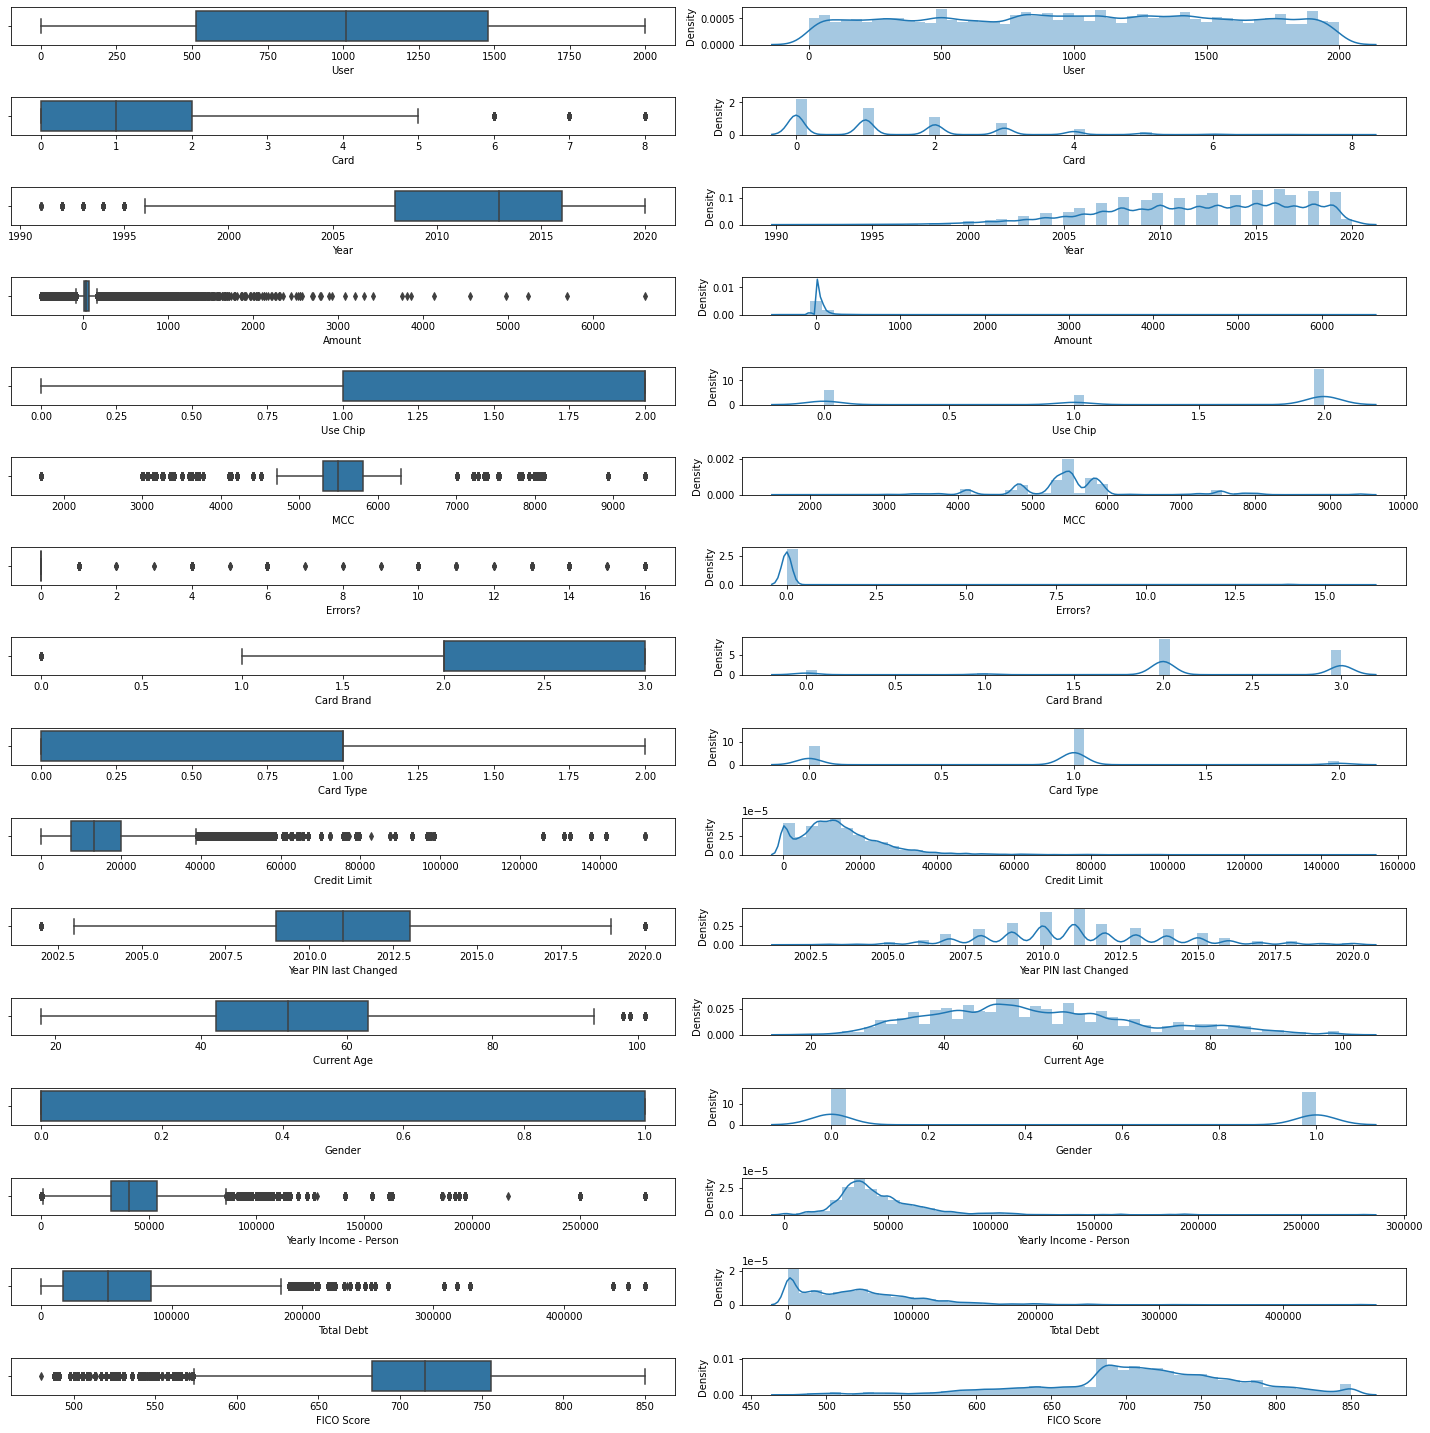

In [ ]:
#Box plots and distribution curves of all features

fig, ax = plt.subplots(16, 2, figsize = (20, 20))
sns.boxplot(x= data["User"], ax = ax[0,0])
sns.distplot(data['User'], ax = ax[0,1])
sns.boxplot(x= data["Card"], ax = ax[1,0])
sns.distplot(data['Card'], ax = ax[1,1])
sns.boxplot(x= data["Year"], ax = ax[2,0])
sns.distplot(data['Year'], ax = ax[2,1])
sns.boxplot(x= data["Amount"], ax = ax[3,0])
sns.distplot(data['Amount'], ax = ax[3,1])
sns.boxplot(x= data["Use Chip"], ax = ax[4,0])
sns.distplot(data['Use Chip'], ax = ax[4,1])
sns.boxplot(x= data["MCC"], ax = ax[5,0])
sns.distplot(data['MCC'], ax = ax[5,1])
sns.boxplot(x= data["Errors?"], ax = ax[6,0])
sns.distplot(data['Errors?'], ax = ax[6,1])
sns.boxplot(x= data["Card Brand"], ax = ax[7,0])
sns.distplot(data['Card Brand'], ax = ax[7,1])
sns.boxplot(x= data["Card Type"], ax = ax[8,0])
sns.distplot(data['Card Type'], ax = ax[8,1])
sns.boxplot(x= data["Credit Limit"], ax = ax[9,0])
sns.distplot(data['Credit Limit'], ax = ax[9,1])
sns.boxplot(x= data["Year PIN last Changed"], ax = ax[10,0])
sns.distplot(data['Year PIN last Changed'], ax = ax[10,1])
sns.boxplot(x= data["Current Age"], ax = ax[11,0])
sns.distplot(data['Current Age'], ax = ax[11,1])
sns.boxplot(x= data["Gender"], ax = ax[12,0])
sns.distplot(data['Gender'], ax = ax[12,1])
sns.boxplot(x= data["Yearly Income - Person"], ax = ax[13,0])
sns.distplot(data['Yearly Income - Person'], ax = ax[13,1])
sns.boxplot(x= data["Total Debt"], ax = ax[14,0])
sns.distplot(data['Total Debt'], ax = ax[14,1])
sns.boxplot(x= data["FICO Score"], ax = ax[15,0])
sns.distplot(data['FICO Score'], ax = ax[15,1])

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


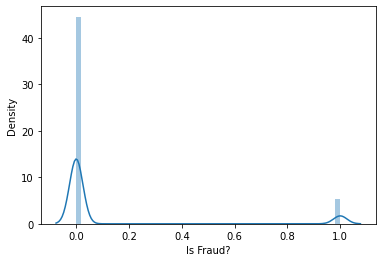

In [ ]:
#Distribution curves of target

plot = sns.distplot(data['Is Fraud?'])
plot.figure.savefig("2.PNG")

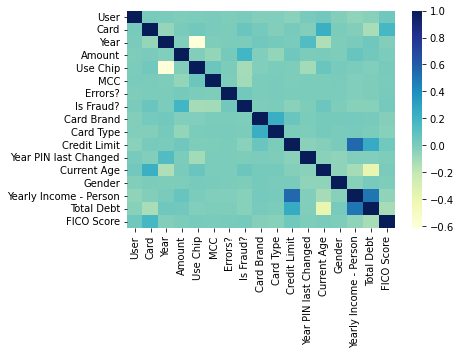

In [ ]:
corr = data.corr()
dataplot = sb.heatmap(corr, cmap="YlGnBu")
data = data.iloc[:,:]
dataplot.figure.savefig("3.PNG")

In [ ]:
data = data[['User', 'Card', 'Year',	'Amount',	'Use Chip',	'MCC',	'Errors?',	'Card Brand',	'Card Type',	'Credit Limit',	'Year PIN last Changed',	'Current Age',	'Gender',	'Yearly Income - Person',	'Total Debt',	'FICO Score', 	'Is Fraud?']]
data

,User,Card,Year,Amount,Use Chip,MCC,Errors?,Card Brand,Card Type,Credit Limit,Year PIN last Changed,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score,Is Fraud?
0,1996,3,2014,148.28,1,3000,0,2,1,2468,2005,62,0,49378,104480,740,1
1,983,1,2010,227.93,2,4900,0,3,1,15516,2014,98,0,42306,472,725,0
2,1835,1,2017,0.48,0,5411,0,3,0,16700,2007,73,0,42593,16083,703,0
3,1208,0,2015,1.37,0,9402,0,2,1,15510,2011,38,1,38663,59053,686,0
4,19,4,2016,80.00,0,4829,0,3,0,6100,2009,66,1,35602,55369,661,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273323,272,3,2016,-62.00,2,5499,0,0,0,8600,2013,37,0,58637,87340,803,0
273324,50,0,2010,2.68,2,5411,0,2,1,28963,2012,42,0,65403,80057,784,0
273325,367,2,2018,8.21,0,5411,0,3,0,8100,2016,88,0,31399,2528,757,0
273326,1644,4,2003,50.19,2,7230,0,2,1,19640,2010,54,0,31240,26005,770,0


In [ ]:
np_data = np.array(data)
X = np_data
Y = np_data
X = X[:,0: (X.shape[1] - 1)]
Y = Y[:, X.shape[1]]

X = np.c_[np.ones(X.shape[0]), X]

X_train = X[0: int(0.8*X.shape[0]), :]
X_test = X[int(0.8*X.shape[0]):, :]
Y = Y.reshape(Y.shape[0], 1)
Y_train = Y[0:int(0.8*Y.shape[0]), :]
Y_test = Y[int(0.8*Y.shape[0]):, :]

# **First cell below** - 
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

# **Second cell below** - 
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
where min, max = feature_range.

# **Third cell below** - 
Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

In [ ]:
np_data = np.array(data)
X_mm = np_data
Y_mm = np_data
X_mm = X_mm[:,0: (X_mm.shape[1] - 1)]
Y_mm = Y_mm[:, X_mm.shape[1]]

scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X_mm)

X_mm = np.c_[np.ones(X_mm.shape[0]), X_mm]

X_train_mm = X_mm[0: int(0.8*X_mm.shape[0]), :]
X_test_mm = X_mm[int(0.8*X_mm.shape[0]):, :]
Y_mm = Y_mm.reshape(Y_mm.shape[0], 1)
Y_train_mm = Y_mm[0:int(0.8*Y_mm.shape[0]), :]
Y_test_mm = Y_mm[int(0.8*Y_mm.shape[0]):, :]

In [ ]:
np_data = np.array(data)
X_ss = np_data
Y_ss = np_data
X_ss = X_ss[:,0: (X_ss.shape[1] - 1)]
Y_ss = Y_ss[:, X_ss.shape[1]]

scaler = StandardScaler()
X_ss = scaler.fit_transform(X_ss)

X_ss = np.c_[np.ones(X_ss.shape[0]), X_ss]

X_train_ss = X_ss[0: int(0.8*X_ss.shape[0]), :]
X_test_ss = X_ss[int(0.8*X_ss.shape[0]):, :]
Y_ss = Y_ss.reshape(Y_ss.shape[0], 1)
Y_train_ss = Y_ss[0:int(0.8*Y_ss.shape[0]), :]
Y_test_ss = Y_ss[int(0.8*Y_ss.shape[0]):, :]

In [ ]:
np_data = np.array(data)
X_r = np_data
Y_r= np_data
X_r = X_r[:,0: (X_r.shape[1] - 1)]
Y_r = Y_r[:, X_r.shape[1]]

scaler = RobustScaler()
X_r = scaler.fit_transform(X_r)

X_r = np.c_[np.ones(X_r.shape[0]), X_r]

X_train_r = X_r[0: int(0.8*X_r.shape[0]), :]
X_test_r = X_r[int(0.8*X_r.shape[0]):, :]
Y_r = Y_r.reshape(Y_r.shape[0], 1)
Y_train_r = Y_r[0:int(0.8*Y_r.shape[0]), :]
Y_test_r = Y_r[int(0.8*Y_r.shape[0]):, :]

In [ ]:
clf = LogisticRegression().fit(X_train, Y_train)
clf_mm = LogisticRegression().fit(X_train_mm, Y_train_mm)
clf_ss = LogisticRegression().fit(X_train_ss, Y_train_ss)
clf_r = LogisticRegression().fit(X_train_r, Y_train_r)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

In [ ]:
print("For training - ")
print(clf.score(X_train, Y_train))
print(clf_mm.score(X_train_mm, Y_train_mm))
print(clf_ss.score(X_train_ss, Y_train_ss))
print(clf_r.score(X_train_r, Y_train_r))
print()
print("For testing - ")
print(clf.score(X_test, Y_test))
print(clf_mm.score(X_test_mm, Y_test_mm))
print(clf_ss.score(X_test_ss, Y_test_ss))
print(clf_r.score(X_test_r, Y_test_r))

For training - 
0.8914351830679313
0.892057147561076
0.892564780345922
0.892564780345922

For testing - 
0.8922547835949219
0.893059671459408
0.8936816302637837
0.8936816302637837


In [ ]:
Y_pred = clf.predict(X_test)
Y_pred_mm = clf_mm.predict(X_test_mm)
Y_pred_ss = clf_ss.predict(X_test_ss)
Y_pred_r = clf_r.predict(X_test_r)


In [ ]:
first = 0
second = 0
third = 0
fourth = 0

#For No preprocessing
#Computed True positives, False positives, False Negatives and True Negatives

total_pred = Y_pred.shape[0]
for i in range(Y_pred.shape[0]):
  if Y_pred[i] == Y_test[i][0] and Y_test[i][0] == 1.0:
    first = first + 1
  if Y_pred[i] != Y_test[i][0] and Y_test[i][0] == 1.0:
    second = second + 1
  if Y_pred[i] != Y_test[i][0] and Y_test[i][0] == 0.0:
    third = third + 1
  if Y_pred[i] == Y_test[i][0] and Y_test[i][0] == 0.0:
    fourth = fourth + 1

#Constructed confusion matrix
confusion_matrix = np.array([[first, second], [third, fourth]])

#Computed Accuracy, Precision, Recall and f_1 Score and printed them
precision = first/(first+second)
recall = first/(first+third)
print("Confusion matrix (No pre processing):")
print(str(confusion_matrix))
print("Accuracy: ", str((first+fourth)/(first+second+third+fourth) * 100), "%")
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("f1_Score: ", str(2*((precision*recall)/(precision+recall))))

#For max min scaled data
#Computed True positives, False positives, False Negatives and True Negatives

first = 0
second = 0
third = 0
fourth = 0

total_pred = Y_pred_mm.shape[0]
for i in range(Y_pred_mm.shape[0]):
  if Y_pred_mm[i] == Y_test_mm[i][0] and Y_test_mm[i][0] == 1.0:
    first = first + 1
  if Y_pred_mm[i] != Y_test_mm[i][0] and Y_test_mm[i][0] == 1.0:
    second = second + 1
  if Y_pred_mm[i] != Y_test_mm[i][0] and Y_test_mm[i][0] == 0.0:
    third = third + 1
  if Y_pred_mm[i] == Y_test_mm[i][0] and Y_test_mm[i][0] == 0.0:
    fourth = fourth + 1

#Constructed confusion matrix
confusion_matrix = np.array([[first, second], [third, fourth]])

#Computed Accuracy, Precision, Recall and f_1 Score and printed them
precision = first/(first+second)
recall = first/(first+third)
print()
print("Confusion matrix (Max Min scaling):")
print(str(confusion_matrix))
print("Accuracy: ", str((first+fourth)/(first+second+third+fourth) * 100), "%")
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("f1_Score: ", str(2*((precision*recall)/(precision+recall))))

#####

first = 0
second = 0
third = 0
fourth = 0

#For Standard scaling data
#Computed True positives, False positives, False Negatives and True Negatives

total_pred = Y_pred_ss.shape[0]
for i in range(Y_pred_ss.shape[0]):
  if Y_pred_ss[i] == Y_test_ss[i][0] and Y_test_ss[i][0] == 1.0:
    first = first + 1
  if Y_pred_ss[i] != Y_test_ss[i][0] and Y_test_ss[i][0] == 1.0:
    second = second + 1
  if Y_pred_ss[i] != Y_test_ss[i][0] and Y_test_ss[i][0] == 0.0:
    third = third + 1
  if Y_pred_ss[i] == Y_test_ss[i][0] and Y_test_ss[i][0] == 0.0:
    fourth = fourth + 1

#Constructed confusion matrix
confusion_matrix = np.array([[first, second], [third, fourth]])

#Computed Accuracy, Precision, Recall and f_1 Score and printed them
precision = first/(first+second)
recall = first/(first+third)
print()
print("Confusion matrix (Standard scaling)):")
print(str(confusion_matrix))
print("Accuracy: ", str((first+fourth)/(first+second+third+fourth) * 100), "%")
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("f1_Score: ", str(2*((precision*recall)/(precision+recall))))

#For robust scaling
#Computed True positives, False positives, False Negatives and True Negatives

first = 0
second = 0
third = 0
fourth = 0

total_pred = Y_pred_r.shape[0]
for i in range(Y_pred_r.shape[0]):
  if Y_pred_r[i] == Y_test_r[i][0] and Y_test_r[i][0] == 1.0:
    first = first + 1
  if Y_pred_r[i] != Y_test_r[i][0] and Y_test_r[i][0] == 1.0:
    second = second + 1
  if Y_pred_r[i] != Y_test_r[i][0] and Y_test_r[i][0] == 0.0:
    third = third + 1
  if Y_pred_r[i] == Y_test_r[i][0] and Y_test_r[i][0] == 0.0:
    fourth = fourth + 1

#Constructed confusion matrix
confusion_matrix = np.array([[first, second], [third, fourth]])

#Computed Accuracy, Precision, Recall and f_1 Score and printed them
precision = first/(first+second)
recall = first/(first+third)
print()
print("Confusion matrix (Robust scaling):")
print(str(confusion_matrix))
print("Accuracy: ", str((first+fourth)/(first+second+third+fourth) * 100), "%")
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("f1_Score: ", str(2*((precision*recall)/(precision+recall))))


Confusion matrix (No pre processing):
[[  221  5700]
 [  190 48555]]
Accuracy:  89.2254783594922 %
Precision:  0.03732477622023307
Recall:  0.537712895377129
f1_Score:  0.06980416929879975

Confusion matrix (Max Min scaling):
[[  204  5717]
 [  129 48616]]
Accuracy:  89.3059671459408 %
Precision:  0.034453639587907446
Recall:  0.6126126126126126
f1_Score:  0.06523824752158618

Confusion matrix (Standard scaling)):
[[  286  5635]
 [  177 48568]]
Accuracy:  89.36816302637837 %
Precision:  0.048302651579125146
Recall:  0.6177105831533477
f1_Score:  0.08959899749373433

Confusion matrix (Robust scaling):
[[  286  5635]
 [  177 48568]]
Accuracy:  89.36816302637837 %
Precision:  0.048302651579125146
Recall:  0.6177105831533477
f1_Score:  0.08959899749373433


In [ ]:
fig.savefig("1.PNG")

(0.0, 1.0)

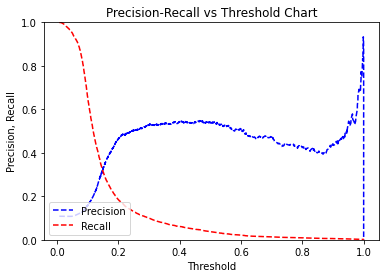

In [ ]:
pred_y=clf.predict(X_test) 

probs_y=clf.predict_proba(X_test) 

precision, recall, thresholds = precision_recall_curve(Y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

Text(0, 0.5, 'True Positive Rate')

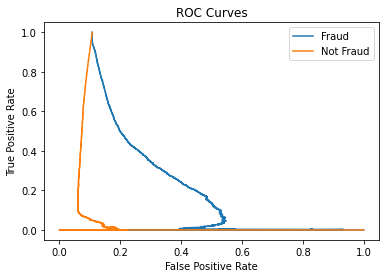

In [ ]:
precision1, recall1, thresholds1 = precision_recall_curve(Y_test, probs_y[:, 0])
fig1, ax1 = plt.subplots()
ax1.plot(precision, recall, label = 'Fraud')
ax1.plot(precision1, recall1, label = 'Not Fraud')
ax1.legend()
ax1.set_title("ROC Curves")
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")


In [ ]:
base_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits = 5)

grid_search_recall = GridSearchCV(estimator=base_model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result_recall = grid_search_recall.fit(X_train, Y_train)

grid_search_precision = GridSearchCV(estimator=base_model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='precision',error_score=0)
grid_result_precision = grid_search_precision.fit(X_train, Y_train)

grid_search_accuracy = GridSearchCV(estimator=base_model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_accuracy = grid_search_accuracy.fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: Th

In [ ]:
score_arr_recall = grid_search_recall.cv_results_['mean_test_score'].reshape(len(c_values), len(solvers))
score_arr_recall = score_arr_recall.T
c_values_str = list(map(str, c_values))
print("Recall scores")
print(score_arr_recall)

score_arr_precision = grid_search_precision.cv_results_['mean_test_score'].reshape(len(c_values), len(solvers))
score_arr_precision = score_arr_precision.T
c_values_str = list(map(str, c_values))
print("Precision scores")
print(score_arr_precision)


score_arr_accuracy = grid_search_accuracy.cv_results_['mean_test_score'].reshape(len(c_values), len(solvers))
score_arr_accuracy = score_arr_accuracy.T
c_values_str = list(map(str, c_values))
print("Accuracy scores")
print(score_arr_accuracy)

Recall scores
[[0.04691527 0.04649923 0.04666382 0.04641516 0.04679102]
 [0.03927952 0.03928763 0.04024052 0.0383129  0.03844129]
 [0.03864939 0.03869682 0.03906853 0.03831313 0.03853083]]
Precision scores
[[0.57147392 0.56925165 0.57105369 0.56957552 0.57196972]
 [0.524338   0.52362166 0.52238958 0.5239443  0.52295993]
 [0.52495761 0.52763295 0.5261714  0.52791213 0.52519495]]
Accuracy scores
[[0.89226752 0.89222179 0.8922538  0.89222636 0.89227209]
 [0.89138945 0.8913803  0.89136658 0.89136658 0.89136201]
 [0.89139402 0.89143061 0.89141232 0.89143061 0.8913986 ]]


Text(0, 0.5, 'Score')

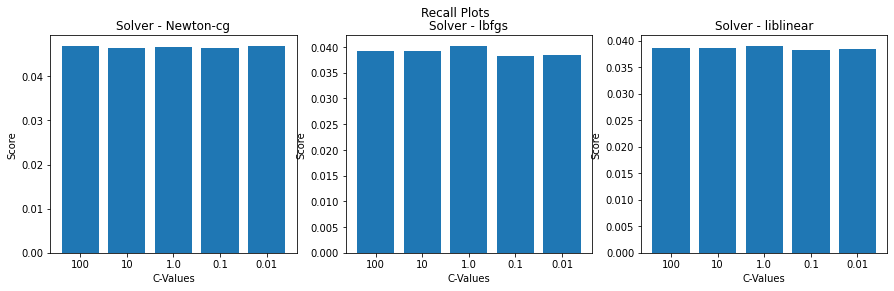

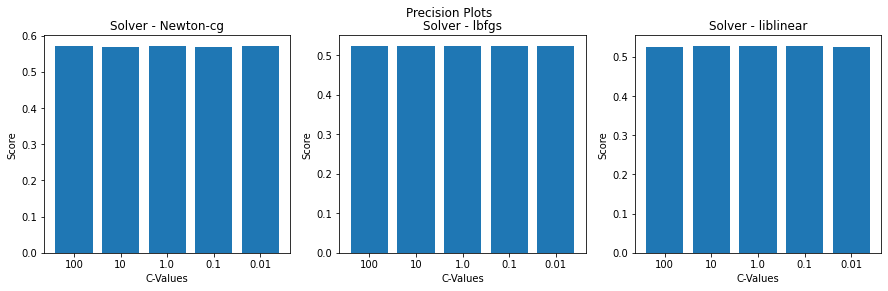

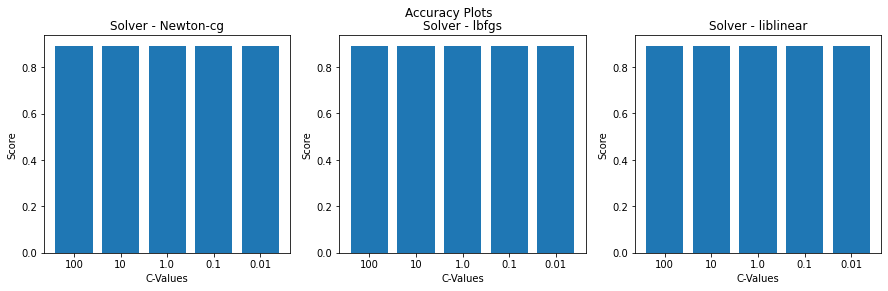

In [ ]:

fig, ax = plt.subplots(1,3, figsize = (15,4))
fig.suptitle('Recall Plots')
ax[0].bar(c_values_str, score_arr_recall[0], label = '1')
ax[0].set_title('Solver - Newton-cg')
ax[0].set_xlabel('C-Values')
ax[0].set_ylabel('Score')
ax[1].bar(c_values_str, score_arr_recall[1], label = '1')
ax[1].set_title('Solver - lbfgs')
ax[1].set_xlabel('C-Values')
ax[1].set_ylabel('Score')
ax[2].bar(c_values_str, score_arr_recall[2], label = '1')
ax[2].set_title('Solver - liblinear')
ax[2].set_xlabel('C-Values')
ax[2].set_ylabel('Score')

fig, ax = plt.subplots(1,3, figsize = (15,4))
fig.suptitle('Precision Plots')
ax[0].bar(c_values_str, score_arr_precision[0], label = '1')
ax[0].set_title('Solver - Newton-cg')
ax[0].set_xlabel('C-Values')
ax[0].set_ylabel('Score')
ax[1].bar(c_values_str, score_arr_precision[1], label = '1')
ax[1].set_title('Solver - lbfgs')
ax[1].set_xlabel('C-Values')
ax[1].set_ylabel('Score')
ax[2].bar(c_values_str, score_arr_precision[2], label = '1')
ax[2].set_title('Solver - liblinear')
ax[2].set_xlabel('C-Values')
ax[2].set_ylabel('Score')

fig, ax = plt.subplots(1,3, figsize = (15,4))
fig.suptitle('Accuracy Plots')
ax[0].bar(c_values_str, score_arr_accuracy[0], label = '1')
ax[0].set_title('Solver - Newton-cg')
ax[0].set_xlabel('C-Values')
ax[0].set_ylabel('Score')
ax[1].bar(c_values_str, score_arr_accuracy[1], label = '1')
ax[1].set_title('Solver - lbfgs')
ax[1].set_xlabel('C-Values')
ax[1].set_ylabel('Score')
ax[2].bar(c_values_str, score_arr_accuracy[2], label = '1')
ax[2].set_title('Solver - liblinear')
ax[2].set_xlabel('C-Values')
ax[2].set_ylabel('Score')


In [ ]:
print("Best recall: %f using %s" % (grid_result_recall.best_score_, grid_result_recall.best_params_))
means_recall = grid_result_recall.cv_results_['mean_test_score']
stds_recall = grid_result_recall.cv_results_['std_test_score']
params_recall = grid_result_recall.cv_results_['params']

print("Best precision: %f using %s" % (grid_result_precision.best_score_, grid_result_precision.best_params_))
means_precision = grid_result_precision.cv_results_['mean_test_score']
stds_precision = grid_result_precision.cv_results_['std_test_score']
params_precision = grid_result_precision.cv_results_['params']

print("Best accuracy: %f using %s" % (grid_result_accuracy.best_score_, grid_result_accuracy.best_params_))
means_accuracy = grid_result_accuracy.cv_results_['mean_test_score']
stds_accuracy = grid_result_accuracy.cv_results_['std_test_score']
params_accuracy = grid_result_accuracy.cv_results_['params']

print()
print("Best model: Solver: %s, C_value: %f" % (solvers[0], c_values[4]))
print("Accuracy: %f, Precision: %f, Recall: %f" % (score_arr_accuracy[0][4], score_arr_precision[0][4], score_arr_recall[0][4]))

Best recall: 0.046915 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best precision: 0.571970 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best accuracy: 0.892272 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

Best model: Solver: newton-cg, C_value: 0.010000
Accuracy: 0.892272, Precision: 0.571970, Recall: 0.046791


In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(16, 8, 4, 2), max_iter = 1200, random_state=1)
model = model.fit(X_train_r, Y_train_r)



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model2 = MLPClassifier(hidden_layer_sizes=(16, 8, 4, 2), max_iter = 1200, random_state=1, activation = 'logistic')
model2 = model2.fit(X_train_r, Y_train_r)

model3 = MLPClassifier(hidden_layer_sizes=(16, 8, 4, 2), max_iter = 1200, random_state=1, activation = 'tanh')
model3 = model3.fit(X_train_r, Y_train_r)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y_pred_nn = model.predict(X_test_r)
Y_pred_nn_2 = model2.predict(X_test_r)
Y_pred_nn_3 = model3.predict(X_test_r)
Y_pred_nn_4 = model3.predict(X_train_r)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

score = precision_score(Y_test_r, Y_pred_nn,)
score2 = accuracy_score(Y_test_r, Y_pred_nn)
score3 = recall_score(Y_test_r, Y_pred_nn)
score4 = f1_score(Y_test_r, Y_pred_nn)
print("Precision: ", str(score))
print("Accuracy: ", str(score2))
print("Recall: ", str(score3))
print("f1 score: ", str(score4))
print()
score_log = precision_score(Y_test_r, Y_pred_nn_2)
score2_log = accuracy_score(Y_test_r, Y_pred_nn_2)
score3_log = recall_score(Y_test_r, Y_pred_nn_2)
score4_log = f1_score(Y_test_r, Y_pred_nn_2)
print("Precision: ", str(score_log))
print("Accuracy: ", str(score2_log))
print("Recall: ", str(score3_log))
print("f1 score: ", str(score4_log))
print()
score_tan = precision_score(Y_test_r, Y_pred_nn_3)
score2_tan = accuracy_score(Y_test_r, Y_pred_nn_3)
score3_tan = recall_score(Y_test_r, Y_pred_nn_3)
score4_tan = f1_score(Y_test_r, Y_pred_nn_3)
print("Precision: ", str(score_tan))
print("Accuracy: ", str(score2_tan))
print("Recall: ", str(score3_tan))
print("f1 score: ", str(score4_tan))
print()
score_tan = precision_score(Y_train_r, Y_pred_nn_4)
score2_tan = accuracy_score(Y_train_r, Y_pred_nn_4)
score3_tan = recall_score(Y_train_r, Y_pred_nn_4)
score4_tan = f1_score(Y_train_r, Y_pred_nn_4)
print("Precision: ", str(score_tan))
print("Accuracy: ", str(score2_tan))
print("Recall: ", str(score3_tan))
print("f1 score: ", str(score4_tan))

precision_list = [score, score_log, score_tan];
accuracy_list = [score2, score2_log, score2_tan];
recall_list = [score3, score3_log, score3_tan];
f1_list = [score4, score4_log, score4_tan];
activation_list = ['relu', 'logistic', 'tanh']

Precision:  0.7809650878363353
Accuracy:  0.9380236344345663
Recall:  0.5937447168216399
f1 score:  0.6746062235881676

Precision:  0.7873576055394237
Accuracy:  0.9388651081110745
Recall:  0.5959425190194421
f1 score:  0.6784064665127021

Precision:  0.8013275349050126
Accuracy:  0.9399626824717374
Recall:  0.5918850380388841
f1 score:  0.6808634772462077

Precision:  0.8124473403358985
Accuracy:  0.9418417466226413
Recall:  0.6066605150574617
f1 score:  0.6946332092688199


Text(0, 0.5, 'F1 Score')

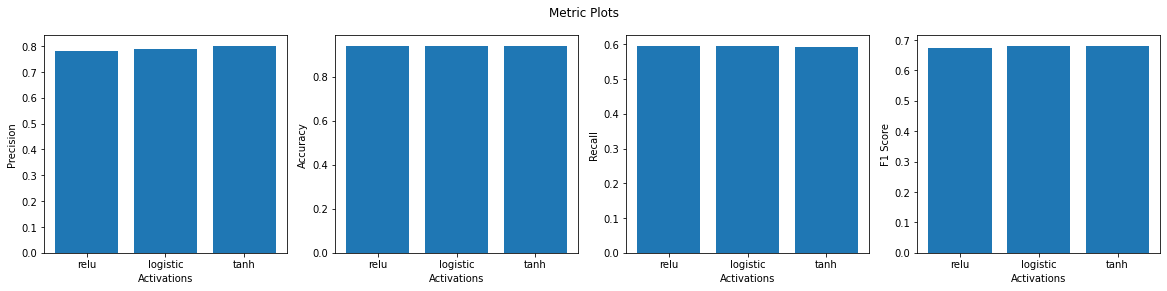

In [ ]:
fig, ax = plt.subplots(1,4, figsize = (20,4))
fig.suptitle('Metric Plots')
ax[0].bar(activation_list, precision_list, label = '1')
ax[0].set_xlabel('Activations')
ax[0].set_ylabel('Precision')
ax[1].bar(activation_list, accuracy_list, label = '1')
ax[1].set_xlabel('Activations')
ax[1].set_ylabel('Accuracy')
ax[2].bar(activation_list, recall_list, label = '1')
ax[2].set_xlabel('Activations')
ax[2].set_ylabel('Recall')
ax[3].bar(activation_list, f1_list, label = '1')
ax[3].set_xlabel('Activations')
ax[3].set_ylabel('F1 Score')

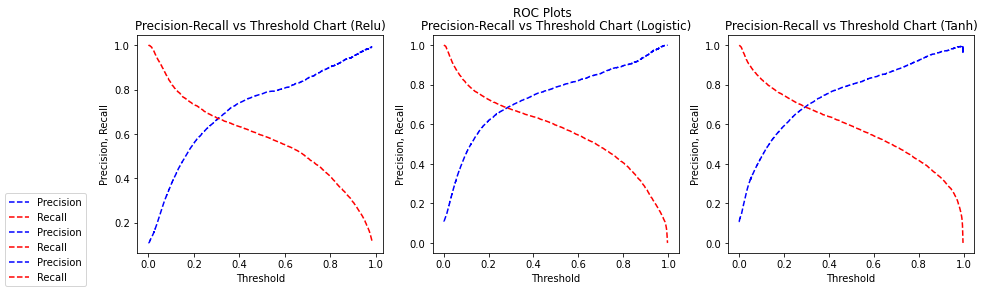

In [ ]:
pred_y=model.predict(X_test_r) 

probs_y=model.predict_proba(X_test_r) 

precision, recall, thresholds = precision_recall_curve(Y_test_r, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

fig, ax = plt.subplots(1,3, figsize = (15,4))
fig.suptitle('ROC Plots')

ax[0].set_title("Precision-Recall vs Threshold Chart (Relu)")
ax[0].plot(thresholds, precision[: -1], "b--", label="Precision")
ax[0].plot(thresholds, recall[: -1], "r--", label="Recall")
ax[0].set_ylabel("Precision, Recall")
ax[0].set_xlabel("Threshold")

pred_y=model2.predict(X_test_r) 

probs_y=model2.predict_proba(X_test_r) 

precision, recall, thresholds = precision_recall_curve(Y_test_r, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

ax[1].set_title("Precision-Recall vs Threshold Chart (Logistic)")
ax[1].plot(thresholds, precision[: -1], "b--", label="Precision")
ax[1].plot(thresholds, recall[: -1], "r--", label="Recall")
ax[1].set_ylabel("Precision, Recall")
ax[1].set_xlabel("Threshold")


pred_y=model3.predict(X_test_r) 

probs_y=model3.predict_proba(X_test_r) 

precision, recall, thresholds = precision_recall_curve(Y_test_r, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

ax[2].set_title("Precision-Recall vs Threshold Chart (Tanh)")
ax[2].plot(thresholds, precision[: -1], "b--", label="Precision")
ax[2].plot(thresholds, recall[: -1], "r--", label="Recall")
ax[2].set_ylabel("Precision, Recall")
ax[2].set_xlabel("Threshold")

fig.legend(loc="lower left")
plt.show()


In [ ]:
first = 0
second = 0
third = 0
fourth = 0

total_pred = Y_pred_nn_3.shape[0]
for i in range(Y_pred_nn_3.shape[0]):
  if Y_pred_nn_3[i] == Y_test_r[i][0] and Y_test_r[i][0] == 1.0:
    first = first + 1
  if Y_pred_nn_3[i] != Y_test_r[i][0] and Y_test_r[i][0] == 1.0:
    second = second + 1
  if Y_pred_nn_3[i] != Y_test_r[i][0] and Y_test_r[i][0] == 0.0:
    third = third + 1
  if Y_pred_nn_3[i] == Y_test_r[i][0] and Y_test_r[i][0] == 0.0:
    fourth = fourth + 1

#Constructed confusion matrix
confusion_matrix = np.array([[first, second], [third, fourth]])

#Computed Accuracy, Precision, Recall and f_1 Score and printed them
precision = first/(first+second)
recall = first/(first+third)
print()
print("Confusion matrix (Robust scaling):")
print(str(confusion_matrix))
print("Accuracy: ", str((first+fourth)/(first+second+third+fourth) * 100), "%")
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("f1_Score: ", str(2*((precision*recall)/(precision+recall))))


Confusion matrix (Robust scaling):
[[ 3501  2414]
 [  868 47883]]
Accuracy:  93.99626824717375 %
Precision:  0.5918850380388841
Recall:  0.8013275349050126
f1_Score:  0.6808634772462077


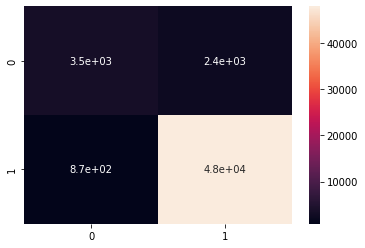

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)